<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up </B> for Health - Deep Learning </div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote </B>and<b> 🍏 ShowUp </b>helper class</B></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
<ol>
<li><B>Problem statement</B>: A clear description of the problem the project aims to solve.</li><BR>
<li><B>Data source</B>: Information on where the data used in the project is obtained from.</li><BR>
<li><B>Libraries used</B>: A list of the Python libraries used in the project and a brief explanation of their role. Include library version.</li><BR>
<li><B>Exploratory Data Analysis (EDA)</B>: A summary of the initial findings from exploring the data.</li><BR>
<li><B>Preprocessing</B>: Steps taken to clean and prepare the data for model building.</li><BR>
<li><B>Model building</B>: An overview of the model used and the reasoning behind its selection.</li><BR>
 Precision = $\frac{\text{true positives}}{\text{true positives + false positives}}$, Recall = $\frac{\text{true positives}}{\text{true positives + false negatives}}$, F1 = $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}$</li><BR><BR>
<li><B>Model evaluation</B>: Evaluation metrics used to assess the performance of the model and results of the evaluation.</li><BR>
<li><B>Conclusion</B>: A summary of the findings and recommendations for further work.</li>
</ol>
</div>

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>wandb.ai Load </B> Athentication</div>

wandb_api_key: `651204c459ad2877b0d32ae2f37ce28d159a9cbe`

In [1]:
import wandb
wandb.login()

wandb: Currently logged in as: drjanduplessis (bromptonhealthpcn). Use `wandb login --relogin` to force relogin


True

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Libries </B> </div>

In [2]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [3]:
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from showupforhealth.params import *
from showupforhealth.utils import *


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Load dataset </B> Train</div>

In [4]:
data = pd.read_csv(f'{OUTPUT_DATA}/full_train_data.csv')
data.shape

(595267, 38)

In [5]:
data['Appointment_status'].value_counts(normalize=True)

1.0    0.963195
0.0    0.036805
Name: Appointment_status, dtype: float64

In [6]:
# Define X and y
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (595267, 37)
y - dependant variable - Appointment_status: (595267,)


In [7]:
X.drop(columns=['Patient ID'], inplace=True)

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, val_size=0.2, test_size=0.1)

✅ OUTPUT: X_train, X_val, X_test, y_train, y_val, y_test
Train Set:  X_train, y_train - (416686, 36), (416686,)
  Val Set:  X_val, y_val - - - (119054, 36), (119054,)
 Test Set:  X_test, y_test - - (59527, 36), (59527,)


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>⛔️ Over Sample using SMOTE </B> This STEP WAS LEFT OUT</div>

In [ ]:
X_train, y_train = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

In [ ]:
y_train.value_counts()

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Random Undersample </B>with Imbalance </div>

In [9]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampler
rus = RandomUnderSampler(sampling_strategy=0.15)

# Fit and transform the data
X_train, y_train = rus.fit_resample(X_train, y_train)

In [10]:
y_train.value_counts()

1.0    103126
0.0     15469
Name: Appointment_status, dtype: int64

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Scale </B> Fit on Train, Transform Train / Val / Test - save scaler to pickle for prediction</div>

In [11]:
#Scale data
# Fit the scaler on the training data
scaler = fit_scaler(X_train, scaler_type='standard')

In [12]:
# Save scaller to Pickle to import in other notebook for prediction
from joblib import dump, load

# Save the scaler object
dump(scaler, f'{MODEL_OUTPUT}/jan_scaler_22sept239am1664.pkl')

['/Users/janduplessis/code/janduplessis883/data-showup/training_outputs/models/jan_scaler_22sept239am1664.pkl']

In [13]:
# Use the fitted scaler to transform both training and test datasets
X_train = transform_data(X_train, scaler)
X_val = transform_data(X_val, scaler)
X_test = transform_data(X_test, scaler)

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Neural Network </B> </div>

In [14]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): # defining a custom F1 score metric
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

metrics = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
    f1_score,  # adding the custom F1 score metric
#     keras.metrics.TruePositives(name='tp'),
#     keras.metrics.FalsePositives(name='fp'),
#     keras.metrics.TrueNegatives(name='tn'),
#     keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [15]:
def plot_loss_precision_recall_curve(history):

    fig, ax = plt.subplots(3, 2, figsize=(20, 15))

    # --- LOSS 
    ax[0, 0].plot(history.history['loss'], color="#a10606")
    ax[0, 0].plot(history.history['val_loss'], color="#1b5743")
    ax[0, 0].set_title('Model loss', fontsize = 18)
    ax[0, 0].set_ylabel('Loss', fontsize = 14)
    ax[0, 0].legend(['Train', 'Val'], loc='upper right')
    ax[0, 0].grid(axis="x", linewidth=0.5)
    ax[0, 0].grid(axis="y", linewidth=0.5)

    # --- RECALL
    ax[0, 1].plot(history.history['recall']) 
    ax[0, 1].plot(history.history['val_recall'])
    ax[0, 1].set_title('Model recall', fontsize = 18)
    ax[0, 1].set_ylabel('Recall', fontsize = 14) 
    ax[0, 1].legend(['Train', 'Val'], loc='lower right')
    ax[0, 1].grid(axis="x", linewidth=0.5)
    ax[0, 1].grid(axis="y", linewidth=0.5)

    # --- PRECISION
    ax[1, 0].plot(history.history['precision'])
    ax[1, 0].plot(history.history['val_precision'])
    ax[1, 0].set_title('Model precision', fontsize = 18)
    ax[1, 0].set_ylabel('Precision', fontsize = 14)
    ax[1, 0].legend(['Train', 'Val'], loc='lower right')
    ax[1, 0].grid(axis="x", linewidth=0.5)
    ax[1, 0].grid(axis="y", linewidth=0.5)

    # --- F1 SCORE 
    ax[1, 1].plot(history.history['f1_score'])
    ax[1, 1].plot(history.history['val_f1_score']) 
    ax[1, 1].set_title('Model F1 Score', fontsize = 18)
    ax[1, 1].set_ylabel('F1 Score', fontsize = 14)
    ax[1, 1].legend(['Train', 'Val'], loc='lower right')
    ax[1, 1].grid(axis="x", linewidth=0.5)
    ax[1, 1].grid(axis="y", linewidth=0.5)
    
    # --- AUC
    ax[2, 0].plot(history.history['auc'])
    ax[2, 0].plot(history.history['val_auc'])
    ax[2, 0].set_title('Model AUC', fontsize = 18) 
    ax[2, 0].set_ylabel('AUC', fontsize = 14)
    ax[2, 0].legend(['Train', 'Val'], loc='lower right')
    ax[2, 0].grid(axis="x", linewidth=0.5)
    ax[2, 0].grid(axis="y", linewidth=0.5)


    ax[2, 1].plot(history.history['accuracy'])
    ax[2, 1].plot(history.history['val_accuracy'])
    ax[2, 1].set_title('Model accuracy', fontsize = 18) 
    ax[2, 1].set_ylabel('accuracy', fontsize = 14)
    ax[2, 1].legend(['Train', 'Val'], loc='lower right')
    ax[2, 1].grid(axis="x", linewidth=0.5)
    ax[2, 1].grid(axis="y", linewidth=0.5)

    # Set common labels  
    fig.text(0.5, 0.04, 'Epoch', ha='center', va='center', fontsize=14) 

    plt.show()

In [16]:
import random
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Start a run, tracking hyperparameters
wandb.init(
    settings=wandb.Settings(start_method="thread"),
    # set the wandb project where this run will be logged
    project="ShowUp Last Try",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 128,
        "activation_1": "relu",
        "dropout": random.uniform(0.3, 0.8),
#         "layer_4": 64,
#         "activation_4": "relu",
#         "dropout": random.uniform(0.3, 0.8),
        "layer_2": 256,
        "activation_2": "relu",
        "layer_3": 16,
        "activation_2": "relu",
        "layer_4": 64,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 200,
        "batch_size": 128
    }
)

In [17]:
from tensorflow.keras.layers import BatchNormalization, Normalization
from tensorflow.keras.optimizers import Adam

def init_model():
    # Assuming X_train is globally accessible; otherwise, pass it as a parameter.
    # Only take the dimensions of a single sample, excluding the batch size.
    input_shape = X_train.shape[1:]

    model = models.Sequential()

    # Input layer specifying the shape
    model.add(layers.InputLayer(input_shape=input_shape))

    # First Dense layer of size 128
    model.add(layers.Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
        # First Dense layer of size 128
    model.add(layers.Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
        # First Dense layer of size 128
    model.add(layers.Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
        # First Dense layer of size 128
    model.add(layers.Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))


    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)

    # Assuming 'metrics' is defined globally; otherwise, specify it directly or pass it as a parameter.
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

    return model

In [18]:
model = init_model()
#model.summary()

In [19]:
es = EarlyStopping(
    patience=30,
    monitor='val_recall', # We really want to detect fraudulent transactions!
    restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=200,
                    batch_size=128, # Large enough to get a decent chance of containing fraudulent transactions 
                    callbacks=[es,
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")], 
                    shuffle=True,
                    verbose=2
                   )

Epoch 1/200


2023-09-22 10:30:17.732990: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 6s - loss: 0.3852 - cross entropy: 0.3852 - f1_score: 0.9060 - accuracy: 0.8372 - precision: 0.8843 - recall: 0.9351 - auc: 0.7211 - prc: 0.9433 - val_loss: 0.1710 - val_cross entropy: 0.1710 - val_f1_score: 0.9793 - val_accuracy: 0.9597 - val_precision: 0.9670 - val_recall: 0.9920 - val_auc: 0.8530 - val_prc: 0.9931 - 6s/epoch - 6ms/step
Epoch 2/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2864 - cross entropy: 0.2864 - f1_score: 0.9313 - accuracy: 0.8756 - precision: 0.8935 - recall: 0.9729 - auc: 0.8538 - prc: 0.9735 - val_loss: 0.1428 - val_cross entropy: 0.1428 - val_f1_score: 0.9787 - val_accuracy: 0.9588 - val_precision: 0.9693 - val_recall: 0.9886 - val_auc: 0.9069 - val_prc: 0.9961 - 4s/epoch - 5ms/step
Epoch 3/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2548 - cross entropy: 0.2548 - f1_score: 0.9340 - accuracy: 0.8814 - precision: 0.9025 - recall: 0.9682 - auc: 0.8923 - prc: 0.9823 - val_loss: 0.1323 - val_cross entropy: 0.1323 - val_f1_score: 0.9800 - val_accuracy: 0.9612 - val_precision: 0.9680 - val_recall: 0.9925 - val_auc: 0.9113 - val_prc: 0.9963 - 5s/epoch - 5ms/step
Epoch 4/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2469 - cross entropy: 0.2469 - f1_score: 0.9352 - accuracy: 0.8837 - precision: 0.9049 - recall: 0.9680 - auc: 0.9001 - prc: 0.9838 - val_loss: 0.1371 - val_cross entropy: 0.1371 - val_f1_score: 0.9798 - val_accuracy: 0.9608 - val_precision: 0.9685 - val_recall: 0.9917 - val_auc: 0.9121 - val_prc: 0.9963 - 4s/epoch - 5ms/step
Epoch 5/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2437 - cross entropy: 0.2437 - f1_score: 0.9361 - accuracy: 0.8854 - precision: 0.9072 - recall: 0.9671 - auc: 0.9032 - prc: 0.9843 - val_loss: 0.1304 - val_cross entropy: 0.1304 - val_f1_score: 0.9803 - val_accuracy: 0.9616 - val_precision: 0.9676 - val_recall: 0.9935 - val_auc: 0.9130 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 6/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2424 - cross entropy: 0.2424 - f1_score: 0.9361 - accuracy: 0.8856 - precision: 0.9079 - recall: 0.9665 - auc: 0.9042 - prc: 0.9845 - val_loss: 0.1324 - val_cross entropy: 0.1324 - val_f1_score: 0.9792 - val_accuracy: 0.9597 - val_precision: 0.9696 - val_recall: 0.9893 - val_auc: 0.9134 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 7/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2409 - cross entropy: 0.2409 - f1_score: 0.9363 - accuracy: 0.8861 - precision: 0.9089 - recall: 0.9658 - auc: 0.9058 - prc: 0.9848 - val_loss: 0.1367 - val_cross entropy: 0.1367 - val_f1_score: 0.9773 - val_accuracy: 0.9563 - val_precision: 0.9717 - val_recall: 0.9833 - val_auc: 0.9131 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 8/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2389 - cross entropy: 0.2389 - f1_score: 0.9369 - accuracy: 0.8871 - precision: 0.9103 - recall: 0.9653 - auc: 0.9074 - prc: 0.9851 - val_loss: 0.1395 - val_cross entropy: 0.1395 - val_f1_score: 0.9794 - val_accuracy: 0.9601 - val_precision: 0.9692 - val_recall: 0.9901 - val_auc: 0.9133 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 9/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2384 - cross entropy: 0.2384 - f1_score: 0.9367 - accuracy: 0.8870 - precision: 0.9102 - recall: 0.9653 - auc: 0.9082 - prc: 0.9853 - val_loss: 0.1382 - val_cross entropy: 0.1382 - val_f1_score: 0.9785 - val_accuracy: 0.9584 - val_precision: 0.9705 - val_recall: 0.9869 - val_auc: 0.9132 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 10/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2369 - cross entropy: 0.2369 - f1_score: 0.9370 - accuracy: 0.8875 - precision: 0.9111 - recall: 0.9647 - auc: 0.9094 - prc: 0.9854 - val_loss: 0.1359 - val_cross entropy: 0.1359 - val_f1_score: 0.9776 - val_accuracy: 0.9568 - val_precision: 0.9717 - val_recall: 0.9839 - val_auc: 0.9140 - val_prc: 0.9964 - 5s/epoch - 6ms/step
Epoch 11/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2369 - cross entropy: 0.2369 - f1_score: 0.9372 - accuracy: 0.8878 - precision: 0.9112 - recall: 0.9651 - auc: 0.9093 - prc: 0.9854 - val_loss: 0.1353 - val_cross entropy: 0.1353 - val_f1_score: 0.9760 - val_accuracy: 0.9540 - val_precision: 0.9730 - val_recall: 0.9794 - val_auc: 0.9144 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 12/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2360 - cross entropy: 0.2360 - f1_score: 0.9373 - accuracy: 0.8880 - precision: 0.9113 - recall: 0.9651 - auc: 0.9104 - prc: 0.9857 - val_loss: 0.1366 - val_cross entropy: 0.1366 - val_f1_score: 0.9771 - val_accuracy: 0.9559 - val_precision: 0.9719 - val_recall: 0.9826 - val_auc: 0.9145 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 13/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2359 - cross entropy: 0.2359 - f1_score: 0.9373 - accuracy: 0.8879 - precision: 0.9116 - recall: 0.9647 - auc: 0.9105 - prc: 0.9857 - val_loss: 0.1397 - val_cross entropy: 0.1397 - val_f1_score: 0.9749 - val_accuracy: 0.9518 - val_precision: 0.9740 - val_recall: 0.9761 - val_auc: 0.9134 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 14/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2347 - cross entropy: 0.2347 - f1_score: 0.9373 - accuracy: 0.8881 - precision: 0.9121 - recall: 0.9643 - auc: 0.9115 - prc: 0.9858 - val_loss: 0.1392 - val_cross entropy: 0.1392 - val_f1_score: 0.9751 - val_accuracy: 0.9522 - val_precision: 0.9741 - val_recall: 0.9763 - val_auc: 0.9138 - val_prc: 0.9964 - 4s/epoch - 5ms/step
Epoch 15/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2345 - cross entropy: 0.2345 - f1_score: 0.9377 - accuracy: 0.8890 - precision: 0.9136 - recall: 0.9634 - auc: 0.9118 - prc: 0.9859 - val_loss: 0.1390 - val_cross entropy: 0.1390 - val_f1_score: 0.9757 - val_accuracy: 0.9533 - val_precision: 0.9737 - val_recall: 0.9780 - val_auc: 0.9143 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 16/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2340 - cross entropy: 0.2340 - f1_score: 0.9376 - accuracy: 0.8888 - precision: 0.9133 - recall: 0.9636 - auc: 0.9122 - prc: 0.9860 - val_loss: 0.1366 - val_cross entropy: 0.1366 - val_f1_score: 0.9764 - val_accuracy: 0.9546 - val_precision: 0.9729 - val_recall: 0.9802 - val_auc: 0.9140 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 17/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2334 - cross entropy: 0.2334 - f1_score: 0.9379 - accuracy: 0.8893 - precision: 0.9132 - recall: 0.9644 - auc: 0.9127 - prc: 0.9861 - val_loss: 0.1334 - val_cross entropy: 0.1334 - val_f1_score: 0.9791 - val_accuracy: 0.9596 - val_precision: 0.9700 - val_recall: 0.9887 - val_auc: 0.9149 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 18/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2328 - cross entropy: 0.2328 - f1_score: 0.9379 - accuracy: 0.8895 - precision: 0.9138 - recall: 0.9637 - auc: 0.9133 - prc: 0.9861 - val_loss: 0.1338 - val_cross entropy: 0.1338 - val_f1_score: 0.9768 - val_accuracy: 0.9552 - val_precision: 0.9726 - val_recall: 0.9812 - val_auc: 0.9146 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 19/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2325 - cross entropy: 0.2325 - f1_score: 0.9384 - accuracy: 0.8904 - precision: 0.9144 - recall: 0.9642 - auc: 0.9135 - prc: 0.9862 - val_loss: 0.1383 - val_cross entropy: 0.1383 - val_f1_score: 0.9764 - val_accuracy: 0.9546 - val_precision: 0.9729 - val_recall: 0.9802 - val_auc: 0.9146 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 20/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2335 - cross entropy: 0.2335 - f1_score: 0.9379 - accuracy: 0.8894 - precision: 0.9131 - recall: 0.9646 - auc: 0.9127 - prc: 0.9860 - val_loss: 0.1365 - val_cross entropy: 0.1365 - val_f1_score: 0.9777 - val_accuracy: 0.9570 - val_precision: 0.9717 - val_recall: 0.9840 - val_auc: 0.9149 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 21/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2318 - cross entropy: 0.2318 - f1_score: 0.9388 - accuracy: 0.8910 - precision: 0.9153 - recall: 0.9638 - auc: 0.9142 - prc: 0.9863 - val_loss: 0.1318 - val_cross entropy: 0.1318 - val_f1_score: 0.9784 - val_accuracy: 0.9582 - val_precision: 0.9710 - val_recall: 0.9861 - val_auc: 0.9143 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 22/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2322 - cross entropy: 0.2322 - f1_score: 0.9381 - accuracy: 0.8898 - precision: 0.9142 - recall: 0.9637 - auc: 0.9139 - prc: 0.9863 - val_loss: 0.1355 - val_cross entropy: 0.1355 - val_f1_score: 0.9772 - val_accuracy: 0.9561 - val_precision: 0.9723 - val_recall: 0.9825 - val_auc: 0.9147 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 23/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2313 - cross entropy: 0.2313 - f1_score: 0.9386 - accuracy: 0.8906 - precision: 0.9150 - recall: 0.9638 - auc: 0.9148 - prc: 0.9864 - val_loss: 0.1372 - val_cross entropy: 0.1372 - val_f1_score: 0.9751 - val_accuracy: 0.9521 - val_precision: 0.9744 - val_recall: 0.9760 - val_auc: 0.9146 - val_prc: 0.9964 - 4s/epoch - 5ms/step
Epoch 24/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2315 - cross entropy: 0.2315 - f1_score: 0.9384 - accuracy: 0.8903 - precision: 0.9149 - recall: 0.9635 - auc: 0.9145 - prc: 0.9863 - val_loss: 0.1328 - val_cross entropy: 0.1328 - val_f1_score: 0.9773 - val_accuracy: 0.9563 - val_precision: 0.9723 - val_recall: 0.9826 - val_auc: 0.9153 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 25/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2311 - cross entropy: 0.2311 - f1_score: 0.9388 - accuracy: 0.8910 - precision: 0.9151 - recall: 0.9642 - auc: 0.9149 - prc: 0.9865 - val_loss: 0.1367 - val_cross entropy: 0.1367 - val_f1_score: 0.9762 - val_accuracy: 0.9543 - val_precision: 0.9732 - val_recall: 0.9796 - val_auc: 0.9148 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 26/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2306 - cross entropy: 0.2306 - f1_score: 0.9390 - accuracy: 0.8915 - precision: 0.9160 - recall: 0.9635 - auc: 0.9153 - prc: 0.9865 - val_loss: 0.1372 - val_cross entropy: 0.1372 - val_f1_score: 0.9757 - val_accuracy: 0.9533 - val_precision: 0.9737 - val_recall: 0.9779 - val_auc: 0.9151 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 27/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2303 - cross entropy: 0.2303 - f1_score: 0.9389 - accuracy: 0.8912 - precision: 0.9158 - recall: 0.9635 - auc: 0.9156 - prc: 0.9865 - val_loss: 0.1343 - val_cross entropy: 0.1343 - val_f1_score: 0.9760 - val_accuracy: 0.9538 - val_precision: 0.9736 - val_recall: 0.9786 - val_auc: 0.9142 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 28/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2303 - cross entropy: 0.2303 - f1_score: 0.9385 - accuracy: 0.8907 - precision: 0.9153 - recall: 0.9635 - auc: 0.9154 - prc: 0.9865 - val_loss: 0.1326 - val_cross entropy: 0.1326 - val_f1_score: 0.9781 - val_accuracy: 0.9576 - val_precision: 0.9715 - val_recall: 0.9849 - val_auc: 0.9150 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 29/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2304 - cross entropy: 0.2304 - f1_score: 0.9388 - accuracy: 0.8910 - precision: 0.9150 - recall: 0.9643 - auc: 0.9154 - prc: 0.9865 - val_loss: 0.1327 - val_cross entropy: 0.1327 - val_f1_score: 0.9765 - val_accuracy: 0.9547 - val_precision: 0.9731 - val_recall: 0.9801 - val_auc: 0.9148 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 30/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2300 - cross entropy: 0.2300 - f1_score: 0.9385 - accuracy: 0.8907 - precision: 0.9157 - recall: 0.9629 - auc: 0.9157 - prc: 0.9866 - val_loss: 0.1360 - val_cross entropy: 0.1360 - val_f1_score: 0.9778 - val_accuracy: 0.9572 - val_precision: 0.9715 - val_recall: 0.9844 - val_auc: 0.9146 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 31/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2296 - cross entropy: 0.2296 - f1_score: 0.9389 - accuracy: 0.8912 - precision: 0.9156 - recall: 0.9638 - auc: 0.9161 - prc: 0.9867 - val_loss: 0.1367 - val_cross entropy: 0.1367 - val_f1_score: 0.9779 - val_accuracy: 0.9573 - val_precision: 0.9715 - val_recall: 0.9846 - val_auc: 0.9147 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 32/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2289 - cross entropy: 0.2289 - f1_score: 0.9389 - accuracy: 0.8913 - precision: 0.9157 - recall: 0.9638 - auc: 0.9169 - prc: 0.9868 - val_loss: 0.1348 - val_cross entropy: 0.1348 - val_f1_score: 0.9760 - val_accuracy: 0.9538 - val_precision: 0.9735 - val_recall: 0.9788 - val_auc: 0.9146 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 33/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2304 - cross entropy: 0.2304 - f1_score: 0.9390 - accuracy: 0.8914 - precision: 0.9157 - recall: 0.9638 - auc: 0.9155 - prc: 0.9866 - val_loss: 0.1359 - val_cross entropy: 0.1359 - val_f1_score: 0.9770 - val_accuracy: 0.9558 - val_precision: 0.9724 - val_recall: 0.9820 - val_auc: 0.9147 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 34/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2289 - cross entropy: 0.2289 - f1_score: 0.9389 - accuracy: 0.8913 - precision: 0.9157 - recall: 0.9638 - auc: 0.9167 - prc: 0.9868 - val_loss: 0.1319 - val_cross entropy: 0.1319 - val_f1_score: 0.9771 - val_accuracy: 0.9558 - val_precision: 0.9726 - val_recall: 0.9818 - val_auc: 0.9151 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 35/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2290 - cross entropy: 0.2290 - f1_score: 0.9388 - accuracy: 0.8913 - precision: 0.9164 - recall: 0.9628 - auc: 0.9167 - prc: 0.9868 - val_loss: 0.1379 - val_cross entropy: 0.1379 - val_f1_score: 0.9770 - val_accuracy: 0.9556 - val_precision: 0.9728 - val_recall: 0.9814 - val_auc: 0.9155 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 36/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2287 - cross entropy: 0.2287 - f1_score: 0.9390 - accuracy: 0.8916 - precision: 0.9168 - recall: 0.9627 - auc: 0.9170 - prc: 0.9868 - val_loss: 0.1346 - val_cross entropy: 0.1346 - val_f1_score: 0.9775 - val_accuracy: 0.9566 - val_precision: 0.9721 - val_recall: 0.9831 - val_auc: 0.9151 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 37/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2285 - cross entropy: 0.2285 - f1_score: 0.9392 - accuracy: 0.8919 - precision: 0.9170 - recall: 0.9629 - auc: 0.9172 - prc: 0.9869 - val_loss: 0.1354 - val_cross entropy: 0.1354 - val_f1_score: 0.9768 - val_accuracy: 0.9554 - val_precision: 0.9726 - val_recall: 0.9813 - val_auc: 0.9147 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 38/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2272 - cross entropy: 0.2272 - f1_score: 0.9393 - accuracy: 0.8922 - precision: 0.9173 - recall: 0.9629 - auc: 0.9183 - prc: 0.9870 - val_loss: 0.1366 - val_cross entropy: 0.1366 - val_f1_score: 0.9766 - val_accuracy: 0.9549 - val_precision: 0.9730 - val_recall: 0.9804 - val_auc: 0.9148 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 39/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2280 - cross entropy: 0.2280 - f1_score: 0.9394 - accuracy: 0.8923 - precision: 0.9169 - recall: 0.9634 - auc: 0.9177 - prc: 0.9869 - val_loss: 0.1379 - val_cross entropy: 0.1379 - val_f1_score: 0.9731 - val_accuracy: 0.9486 - val_precision: 0.9756 - val_recall: 0.9710 - val_auc: 0.9153 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 40/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2273 - cross entropy: 0.2273 - f1_score: 0.9396 - accuracy: 0.8927 - precision: 0.9173 - recall: 0.9634 - auc: 0.9182 - prc: 0.9870 - val_loss: 0.1386 - val_cross entropy: 0.1386 - val_f1_score: 0.9748 - val_accuracy: 0.9517 - val_precision: 0.9744 - val_recall: 0.9754 - val_auc: 0.9150 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 41/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2272 - cross entropy: 0.2272 - f1_score: 0.9396 - accuracy: 0.8927 - precision: 0.9175 - recall: 0.9632 - auc: 0.9181 - prc: 0.9870 - val_loss: 0.1364 - val_cross entropy: 0.1364 - val_f1_score: 0.9755 - val_accuracy: 0.9529 - val_precision: 0.9738 - val_recall: 0.9774 - val_auc: 0.9147 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 42/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2273 - cross entropy: 0.2273 - f1_score: 0.9397 - accuracy: 0.8929 - precision: 0.9180 - recall: 0.9629 - auc: 0.9181 - prc: 0.9870 - val_loss: 0.1398 - val_cross entropy: 0.1398 - val_f1_score: 0.9738 - val_accuracy: 0.9498 - val_precision: 0.9751 - val_recall: 0.9728 - val_auc: 0.9146 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 43/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2269 - cross entropy: 0.2269 - f1_score: 0.9398 - accuracy: 0.8930 - precision: 0.9177 - recall: 0.9633 - auc: 0.9185 - prc: 0.9871 - val_loss: 0.1380 - val_cross entropy: 0.1380 - val_f1_score: 0.9750 - val_accuracy: 0.9521 - val_precision: 0.9743 - val_recall: 0.9761 - val_auc: 0.9152 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 44/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2270 - cross entropy: 0.2270 - f1_score: 0.9392 - accuracy: 0.8921 - precision: 0.9177 - recall: 0.9621 - auc: 0.9184 - prc: 0.9871 - val_loss: 0.1360 - val_cross entropy: 0.1360 - val_f1_score: 0.9767 - val_accuracy: 0.9551 - val_precision: 0.9727 - val_recall: 0.9809 - val_auc: 0.9151 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 45/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2269 - cross entropy: 0.2269 - f1_score: 0.9395 - accuracy: 0.8925 - precision: 0.9170 - recall: 0.9636 - auc: 0.9184 - prc: 0.9871 - val_loss: 0.1355 - val_cross entropy: 0.1355 - val_f1_score: 0.9765 - val_accuracy: 0.9548 - val_precision: 0.9731 - val_recall: 0.9802 - val_auc: 0.9152 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 46/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2268 - cross entropy: 0.2268 - f1_score: 0.9396 - accuracy: 0.8927 - precision: 0.9176 - recall: 0.9630 - auc: 0.9187 - prc: 0.9871 - val_loss: 0.1404 - val_cross entropy: 0.1404 - val_f1_score: 0.9755 - val_accuracy: 0.9530 - val_precision: 0.9740 - val_recall: 0.9773 - val_auc: 0.9152 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 47/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2265 - cross entropy: 0.2265 - f1_score: 0.9398 - accuracy: 0.8930 - precision: 0.9178 - recall: 0.9632 - auc: 0.9190 - prc: 0.9872 - val_loss: 0.1355 - val_cross entropy: 0.1355 - val_f1_score: 0.9754 - val_accuracy: 0.9528 - val_precision: 0.9738 - val_recall: 0.9773 - val_auc: 0.9150 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 48/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2258 - cross entropy: 0.2258 - f1_score: 0.9402 - accuracy: 0.8938 - precision: 0.9189 - recall: 0.9629 - auc: 0.9195 - prc: 0.9872 - val_loss: 0.1332 - val_cross entropy: 0.1332 - val_f1_score: 0.9767 - val_accuracy: 0.9551 - val_precision: 0.9727 - val_recall: 0.9810 - val_auc: 0.9150 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 49/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2255 - cross entropy: 0.2255 - f1_score: 0.9399 - accuracy: 0.8933 - precision: 0.9186 - recall: 0.9626 - auc: 0.9198 - prc: 0.9873 - val_loss: 0.1426 - val_cross entropy: 0.1426 - val_f1_score: 0.9749 - val_accuracy: 0.9519 - val_precision: 0.9743 - val_recall: 0.9758 - val_auc: 0.9148 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 50/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2263 - cross entropy: 0.2263 - f1_score: 0.9394 - accuracy: 0.8926 - precision: 0.9184 - recall: 0.9619 - auc: 0.9191 - prc: 0.9872 - val_loss: 0.1435 - val_cross entropy: 0.1435 - val_f1_score: 0.9751 - val_accuracy: 0.9521 - val_precision: 0.9744 - val_recall: 0.9760 - val_auc: 0.9146 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 51/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2262 - cross entropy: 0.2262 - f1_score: 0.9395 - accuracy: 0.8928 - precision: 0.9189 - recall: 0.9616 - auc: 0.9191 - prc: 0.9872 - val_loss: 0.1379 - val_cross entropy: 0.1379 - val_f1_score: 0.9747 - val_accuracy: 0.9515 - val_precision: 0.9745 - val_recall: 0.9752 - val_auc: 0.9146 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 52/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2253 - cross entropy: 0.2253 - f1_score: 0.9397 - accuracy: 0.8930 - precision: 0.9187 - recall: 0.9621 - auc: 0.9199 - prc: 0.9873 - val_loss: 0.1341 - val_cross entropy: 0.1341 - val_f1_score: 0.9745 - val_accuracy: 0.9510 - val_precision: 0.9747 - val_recall: 0.9745 - val_auc: 0.9148 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 53/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2252 - cross entropy: 0.2252 - f1_score: 0.9403 - accuracy: 0.8942 - precision: 0.9197 - recall: 0.9623 - auc: 0.9200 - prc: 0.9873 - val_loss: 0.1376 - val_cross entropy: 0.1376 - val_f1_score: 0.9746 - val_accuracy: 0.9512 - val_precision: 0.9747 - val_recall: 0.9747 - val_auc: 0.9147 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 54/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2251 - cross entropy: 0.2251 - f1_score: 0.9399 - accuracy: 0.8935 - precision: 0.9196 - recall: 0.9616 - auc: 0.9201 - prc: 0.9873 - val_loss: 0.1379 - val_cross entropy: 0.1379 - val_f1_score: 0.9768 - val_accuracy: 0.9552 - val_precision: 0.9728 - val_recall: 0.9810 - val_auc: 0.9148 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 55/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2247 - cross entropy: 0.2247 - f1_score: 0.9403 - accuracy: 0.8940 - precision: 0.9190 - recall: 0.9630 - auc: 0.9204 - prc: 0.9874 - val_loss: 0.1347 - val_cross entropy: 0.1347 - val_f1_score: 0.9751 - val_accuracy: 0.9521 - val_precision: 0.9742 - val_recall: 0.9762 - val_auc: 0.9145 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 56/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2242 - cross entropy: 0.2242 - f1_score: 0.9402 - accuracy: 0.8940 - precision: 0.9202 - recall: 0.9615 - auc: 0.9208 - prc: 0.9875 - val_loss: 0.1361 - val_cross entropy: 0.1361 - val_f1_score: 0.9770 - val_accuracy: 0.9557 - val_precision: 0.9723 - val_recall: 0.9821 - val_auc: 0.9145 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 57/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2259 - cross entropy: 0.2259 - f1_score: 0.9396 - accuracy: 0.8929 - precision: 0.9187 - recall: 0.9620 - auc: 0.9194 - prc: 0.9872 - val_loss: 0.1386 - val_cross entropy: 0.1386 - val_f1_score: 0.9757 - val_accuracy: 0.9532 - val_precision: 0.9737 - val_recall: 0.9779 - val_auc: 0.9150 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 58/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2247 - cross entropy: 0.2247 - f1_score: 0.9395 - accuracy: 0.8927 - precision: 0.9185 - recall: 0.9620 - auc: 0.9205 - prc: 0.9875 - val_loss: 0.1324 - val_cross entropy: 0.1324 - val_f1_score: 0.9768 - val_accuracy: 0.9554 - val_precision: 0.9728 - val_recall: 0.9811 - val_auc: 0.9146 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 59/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2249 - cross entropy: 0.2249 - f1_score: 0.9396 - accuracy: 0.8929 - precision: 0.9190 - recall: 0.9616 - auc: 0.9202 - prc: 0.9874 - val_loss: 0.1322 - val_cross entropy: 0.1322 - val_f1_score: 0.9777 - val_accuracy: 0.9569 - val_precision: 0.9720 - val_recall: 0.9836 - val_auc: 0.9152 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 60/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2246 - cross entropy: 0.2246 - f1_score: 0.9401 - accuracy: 0.8938 - precision: 0.9192 - recall: 0.9624 - auc: 0.9206 - prc: 0.9874 - val_loss: 0.1380 - val_cross entropy: 0.1380 - val_f1_score: 0.9756 - val_accuracy: 0.9530 - val_precision: 0.9741 - val_recall: 0.9773 - val_auc: 0.9148 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 61/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2245 - cross entropy: 0.2245 - f1_score: 0.9398 - accuracy: 0.8932 - precision: 0.9194 - recall: 0.9616 - auc: 0.9205 - prc: 0.9874 - val_loss: 0.1318 - val_cross entropy: 0.1318 - val_f1_score: 0.9777 - val_accuracy: 0.9570 - val_precision: 0.9719 - val_recall: 0.9838 - val_auc: 0.9142 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 62/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2245 - cross entropy: 0.2245 - f1_score: 0.9404 - accuracy: 0.8943 - precision: 0.9201 - recall: 0.9621 - auc: 0.9207 - prc: 0.9875 - val_loss: 0.1365 - val_cross entropy: 0.1365 - val_f1_score: 0.9755 - val_accuracy: 0.9530 - val_precision: 0.9742 - val_recall: 0.9771 - val_auc: 0.9143 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 63/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2248 - cross entropy: 0.2248 - f1_score: 0.9396 - accuracy: 0.8930 - precision: 0.9194 - recall: 0.9612 - auc: 0.9204 - prc: 0.9875 - val_loss: 0.1370 - val_cross entropy: 0.1370 - val_f1_score: 0.9758 - val_accuracy: 0.9534 - val_precision: 0.9741 - val_recall: 0.9777 - val_auc: 0.9145 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 64/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2245 - cross entropy: 0.2245 - f1_score: 0.9398 - accuracy: 0.8933 - precision: 0.9190 - recall: 0.9621 - auc: 0.9206 - prc: 0.9874 - val_loss: 0.1338 - val_cross entropy: 0.1338 - val_f1_score: 0.9772 - val_accuracy: 0.9560 - val_precision: 0.9724 - val_recall: 0.9822 - val_auc: 0.9140 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 65/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2234 - cross entropy: 0.2234 - f1_score: 0.9403 - accuracy: 0.8940 - precision: 0.9199 - recall: 0.9619 - auc: 0.9214 - prc: 0.9876 - val_loss: 0.1366 - val_cross entropy: 0.1366 - val_f1_score: 0.9773 - val_accuracy: 0.9562 - val_precision: 0.9722 - val_recall: 0.9826 - val_auc: 0.9140 - val_prc: 0.9964 - 5s/epoch - 5ms/step
Epoch 66/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2236 - cross entropy: 0.2236 - f1_score: 0.9397 - accuracy: 0.8931 - precision: 0.9195 - recall: 0.9612 - auc: 0.9212 - prc: 0.9875 - val_loss: 0.1371 - val_cross entropy: 0.1371 - val_f1_score: 0.9755 - val_accuracy: 0.9529 - val_precision: 0.9742 - val_recall: 0.9770 - val_auc: 0.9146 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 67/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2237 - cross entropy: 0.2237 - f1_score: 0.9403 - accuracy: 0.8942 - precision: 0.9196 - recall: 0.9624 - auc: 0.9213 - prc: 0.9876 - val_loss: 0.1370 - val_cross entropy: 0.1370 - val_f1_score: 0.9768 - val_accuracy: 0.9553 - val_precision: 0.9728 - val_recall: 0.9810 - val_auc: 0.9146 - val_prc: 0.9965 - 5s/epoch - 5ms/step
Epoch 68/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 4s - loss: 0.2229 - cross entropy: 0.2229 - f1_score: 0.9404 - accuracy: 0.8945 - precision: 0.9209 - recall: 0.9612 - auc: 0.9220 - prc: 0.9877 - val_loss: 0.1365 - val_cross entropy: 0.1365 - val_f1_score: 0.9780 - val_accuracy: 0.9575 - val_precision: 0.9714 - val_recall: 0.9849 - val_auc: 0.9144 - val_prc: 0.9965 - 4s/epoch - 5ms/step
Epoch 69/200
INFO:tensorflow:Assets written to: models/assets


wandb: Adding directory to artifact (./models)... Done. 0.0s


927/927 - 5s - loss: 0.2226 - cross entropy: 0.2226 - f1_score: 0.9408 - accuracy: 0.8951 - precision: 0.9210 - recall: 0.9619 - auc: 0.9223 - prc: 0.9877 - val_loss: 0.1289 - val_cross entropy: 0.1289 - val_f1_score: 0.9797 - val_accuracy: 0.9606 - val_precision: 0.9686 - val_recall: 0.9912 - val_auc: 0.9144 - val_prc: 0.9965 - 5s/epoch - 5ms/step


In [20]:
wandb.finish()


batch/accuracy,▁▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇█▇█▇▇██████████
batch/auc,▁▇▇▇██▇█████████████████████████████████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/cross entropy,█▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/f1_score,▁▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇████████████████████
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/prc,▁▇█▇████████████████████████████████████
batch/precision,▁▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█▇▇▇▇█▇▇█▇█▇█▇▇█████
batch/recall,▁█▇████████▇▇███████▇█████▇█▇▇▇██▇▇██▇▇▇
epoch/accuracy,▁▆▇▇▇▇▇▇▇▇▇▇▇▇██▇▇██████████████████████


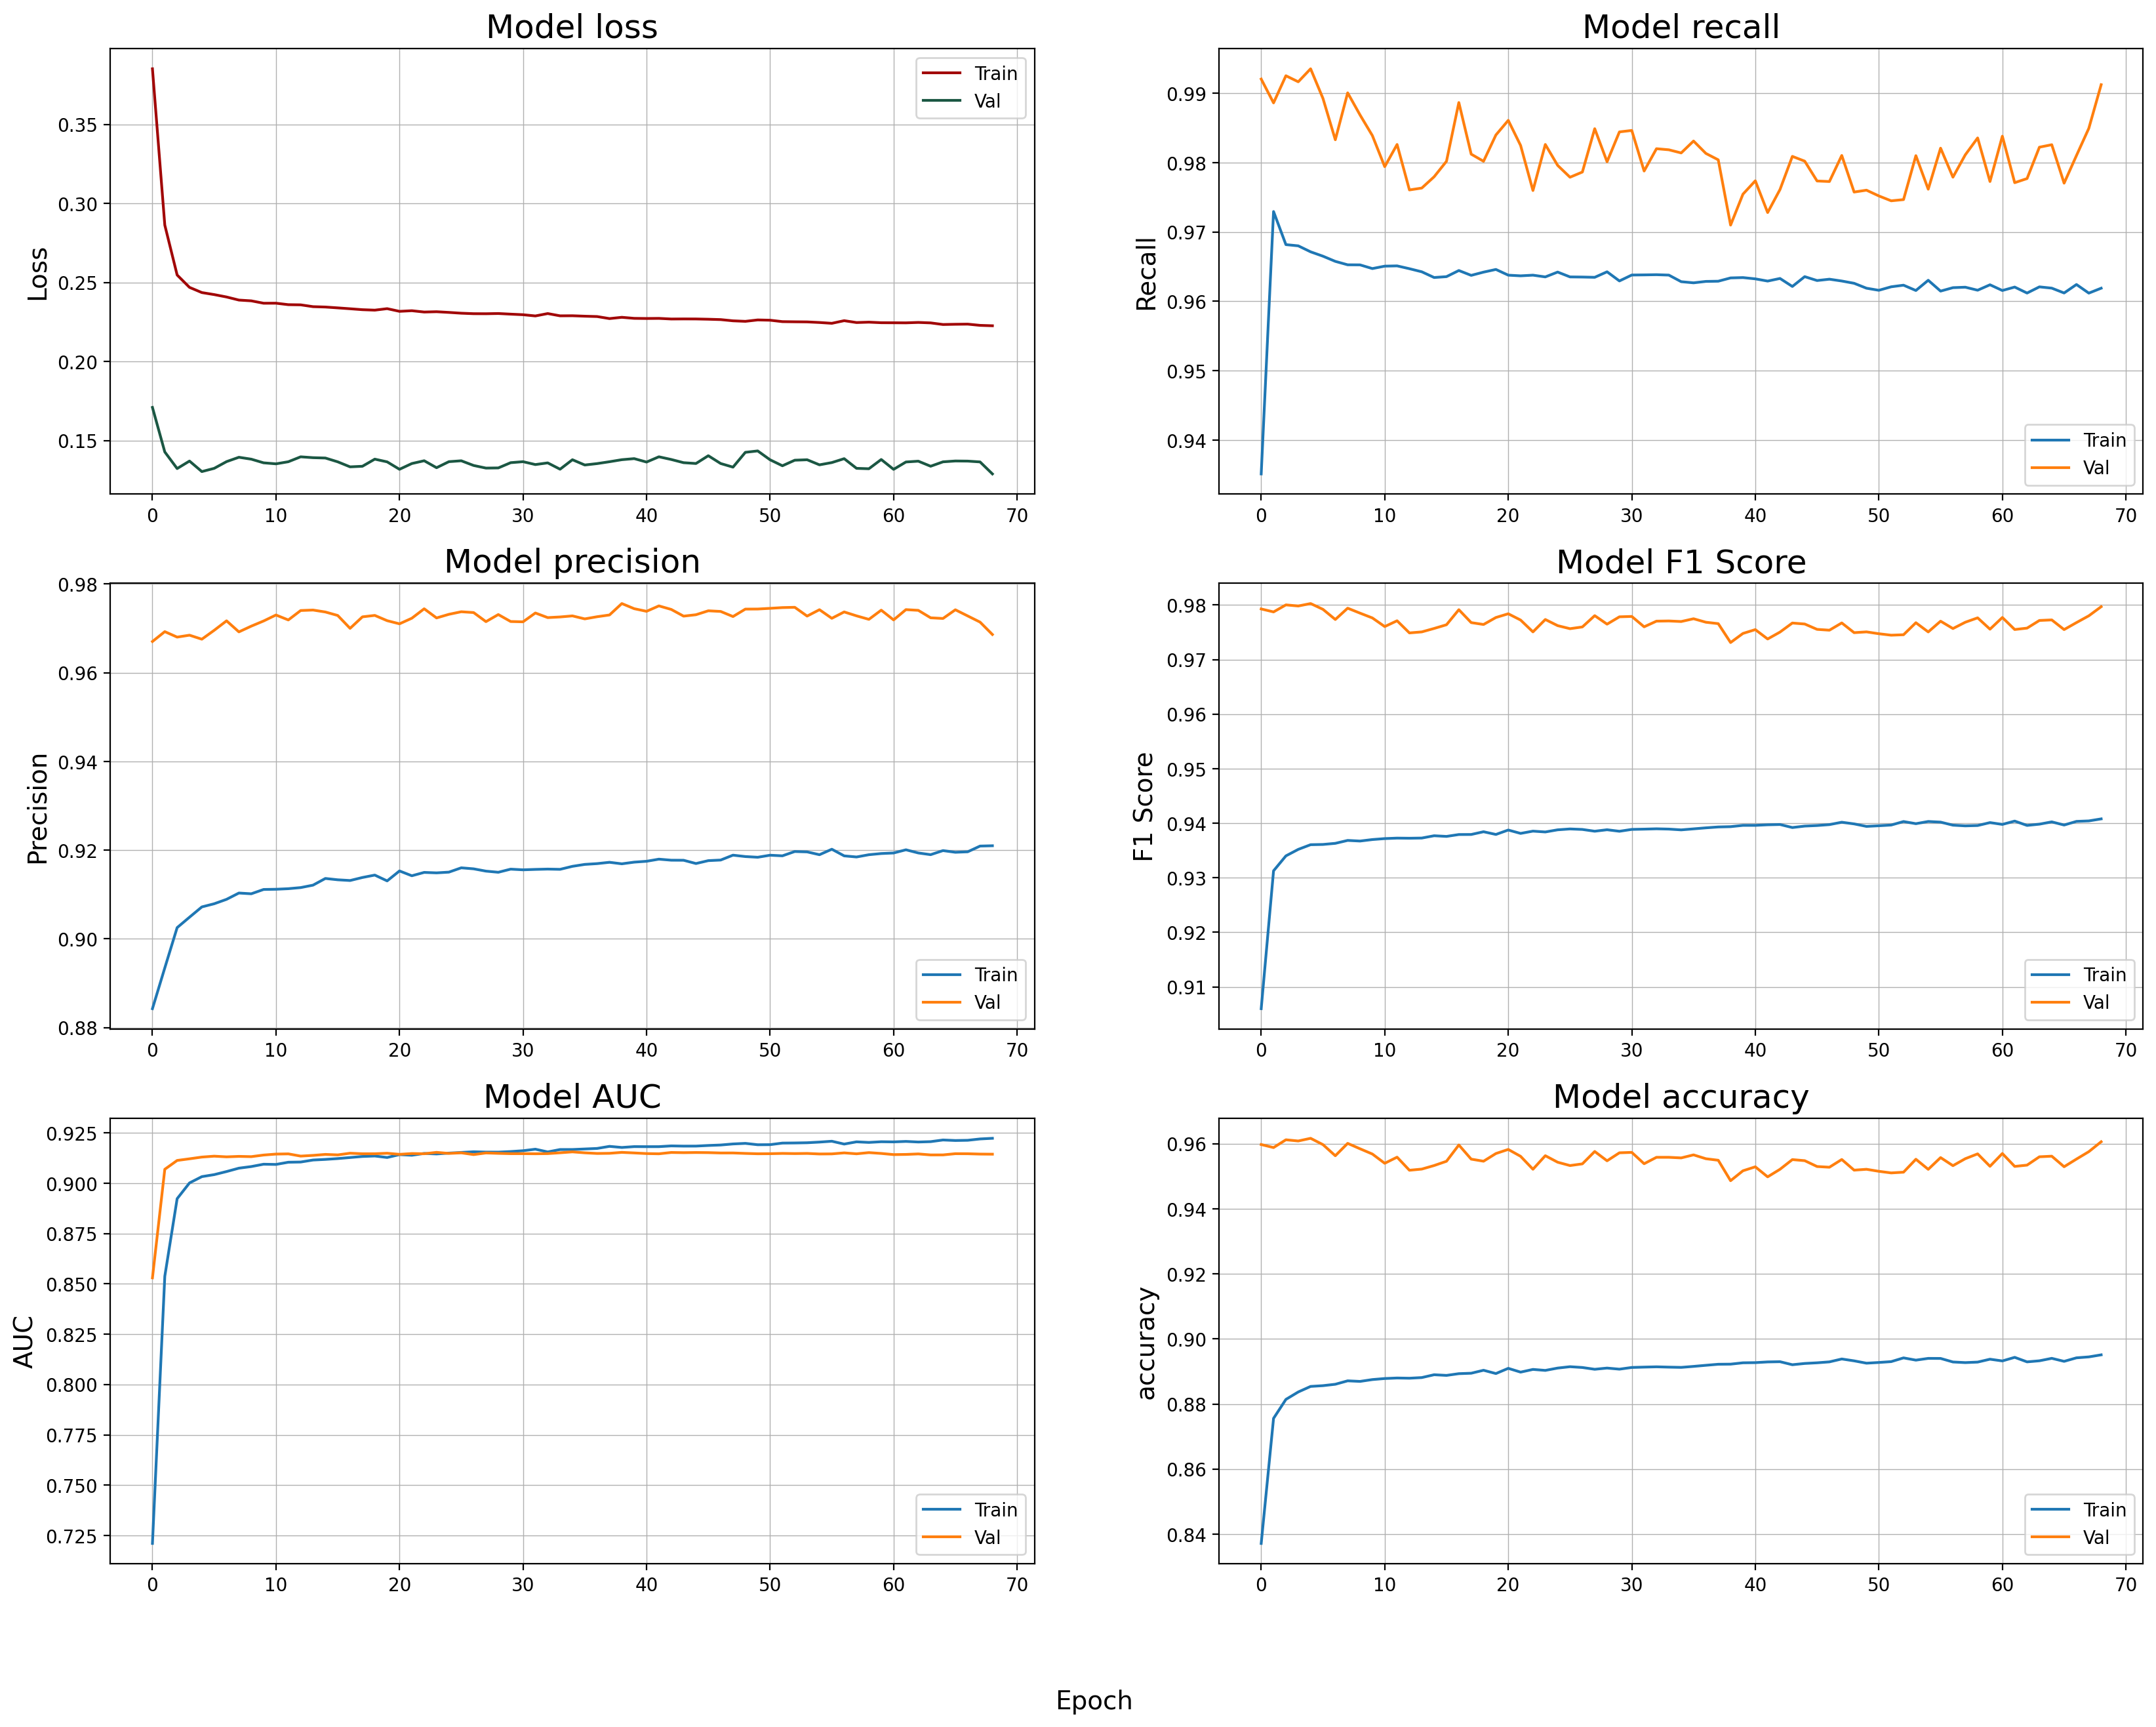

Show Up for Health


In [21]:
plot_loss_precision_recall_curve(history)
print("Show Up for Health")

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Score Model </B>- on unseen ddata</div>

In [22]:
model.predict(X_test)

1861/1861 [==============================] - 1s 360us/step


array([[0.9997121 ],
       [0.9996742 ],
       [0.99937856],
       ...,
       [0.99970657],
       [0.823067  ],
       [0.99974114]], dtype=float32)

In [23]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.1367015838623047,
 'cross entropy': 0.1367015838623047,
 'f1_score': 0.973585307598114,
 'accuracy': 0.9499386548995972,
 'precision': 0.9764472842216492,
 'recall': 0.9715136885643005,
 'auc': 0.9170928001403809,
 'prc': 0.9965906143188477}

In [24]:
from datetime import datetime

now = datetime.now()
datetime_string = now.strftime("%Y-%m-%d %H-%M-%S")

model.save(f'{MODEL_OUTPUT}/model_weights_gentle_water{datetime_string}.h5') 

In [25]:
y_pred_proba = model.predict(X_test)

1861/1861 [==============================] - 1s 361us/step


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Confusion Matrix </B> Adjust Threshold</div>

In [26]:
threshold = 0.60 # 50% 

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[ 1198,   933],
       [ 3638, 53758]])

Text(0.5, 25.722222222222214, 'Predicted label')

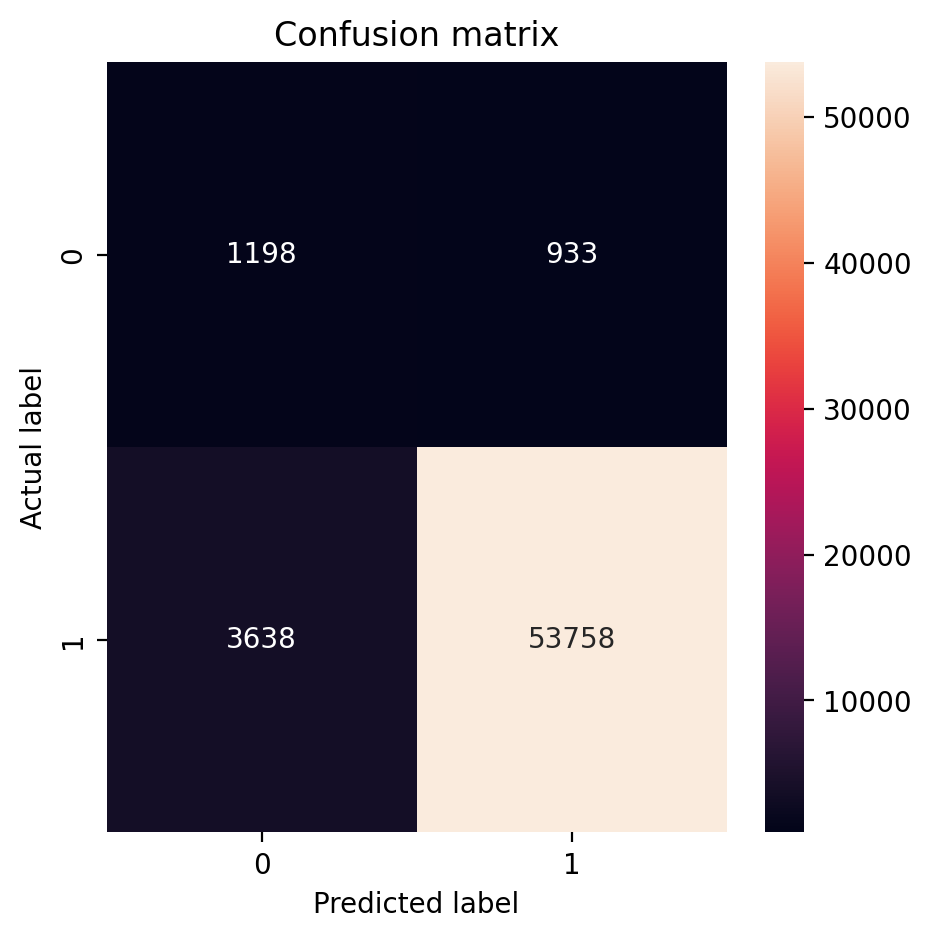

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')